#### Import the necessary libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loaded the dataset and printed some rows

In [170]:
df=pd.read_csv('Desktop/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#### Shape and summary of the dataframe

In [172]:
df.shape

(1453, 15)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [174]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [175]:
df.describe(include='object')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


#### Identify the missing values

In [177]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

#### Exploratory data analysis

In [179]:
visit_frequency=df['VisitFrequency'].value_counts()

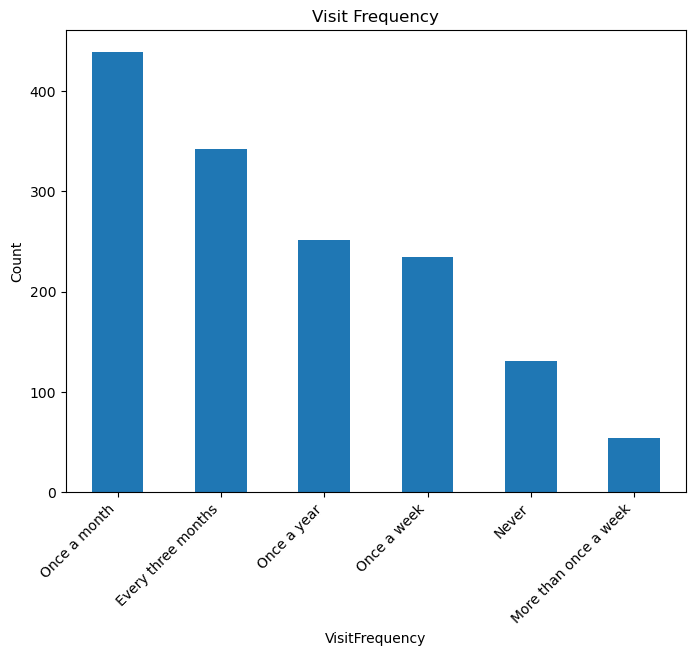

In [180]:
visit_frequency.plot(kind='bar',figsize=(8,6))
plt.ylabel('Count')
plt.title('Visit Frequency')
plt.xticks(rotation=45,ha='right')
plt.show()

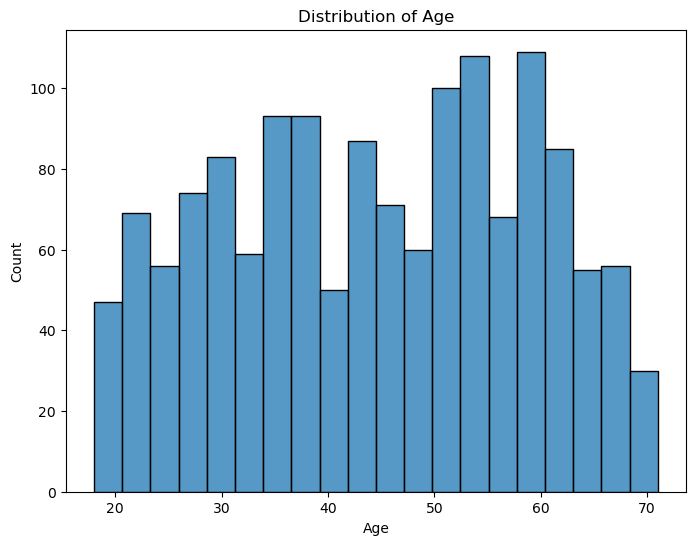

In [181]:
plt.figure(figsize=(8,6))
sns.histplot(df,x='Age',bins=20)
plt.title("Distribution of Age")
plt.show()

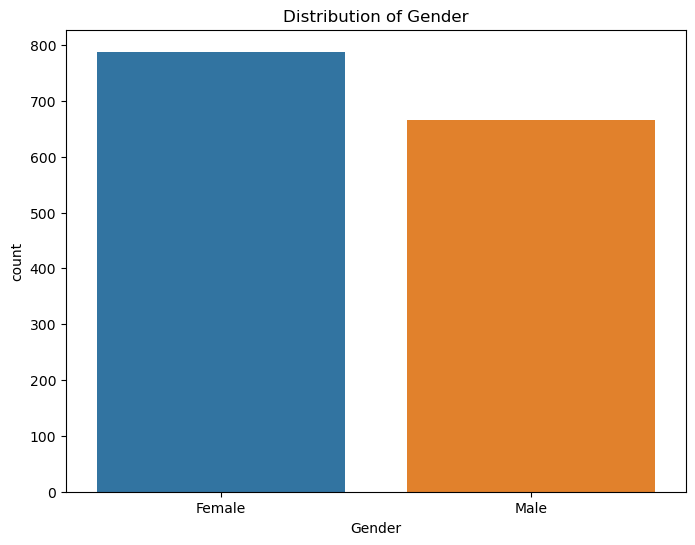

In [182]:
plt.figure(figsize=(8,6))
sns.countplot(df,x='Gender',hue='Gender')
plt.title("Distribution of Gender")
plt.show()

#### Data preprocessing handling categorical data and Standardization

In [184]:
from sklearn.preprocessing import LabelEncoder

binary_columns = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy',
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
]
data_encoded = df.copy()
for col in binary_columns:
    data_encoded[col] = data_encoded[col].apply(lambda x: 1 if x == 'Yes' else 0)

label_encoder = LabelEncoder()
data_encoded['VisitFrequency'] = label_encoder.fit_transform(data_encoded['VisitFrequency'])
data_encoded['Gender'] = label_encoder.fit_transform(data_encoded['Gender'])

In [185]:
data_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [186]:
features = binary_columns + ['Age', 'VisitFrequency', 'Gender']

X = data_encoded[features]

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Model training Kmeans

In [189]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=42)
clusters = km.fit_predict(X_scaled)

data_encoded['Cluster'] = clusters

In [190]:
km.inertia_

14581.691469721429

In [191]:
centroids = km.cluster_centers_
centroids

array([[ 0.358683  ,  0.19746725,  0.10027639, -2.55509245, -0.87879005,
         0.09881772,  0.1862643 ,  0.38897366, -0.30738654,  1.02534387,
        -0.47103665,  0.36427738, -0.03030276,  0.14951661],
       [ 0.68639538,  0.29017207, -0.01869457,  0.39137527, -0.05030968,
         0.13993614,  0.13292006,  0.68278499, -0.09717929,  0.03312454,
        -0.38984069, -0.31723579, -0.02917397, -0.08645679],
       [-1.02343148,  0.31873518,  0.01881031,  0.35742979,  0.30688442,
        -0.02836405, -0.14038025, -0.99419748,  0.1090124 , -0.35974312,
         0.49193254,  0.32098737,  0.03164884,  0.03870844],
       [-0.94662767, -3.13740077, -0.09621868, -0.0191981 ,  0.43942694,
        -0.87033992, -0.55267322, -1.07159586,  0.62134327, -0.35453857,
         1.2301056 ,  0.23535437,  0.10349571,  0.16721989]])

#### Elbow Method: Determining Optimal Clusters for K-Means

In [193]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(data_encoded[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Age',
       'VisitFrequency', 'Gender']])
    sse.append(km.inertia_)
sse

[301272.51479697175,
 79605.6646915779,
 43600.27976314227,
 27182.156928615103,
 20570.56273898558,
 16824.65151156817,
 15325.248103940496,
 13313.055056950034,
 12112.471493487963]

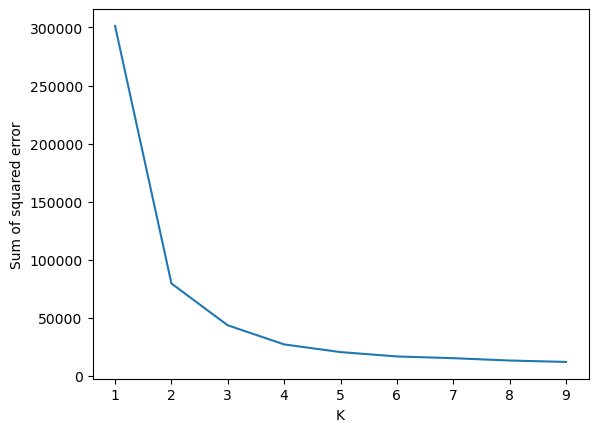

In [194]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

#### Distribution of Data Points Across Clusters

In [196]:
print(data_encoded['Cluster'].value_counts())

Cluster
1    726
2    434
0    171
3    122
Name: count, dtype: int64


#### PCA-Based Visualization of Clusters

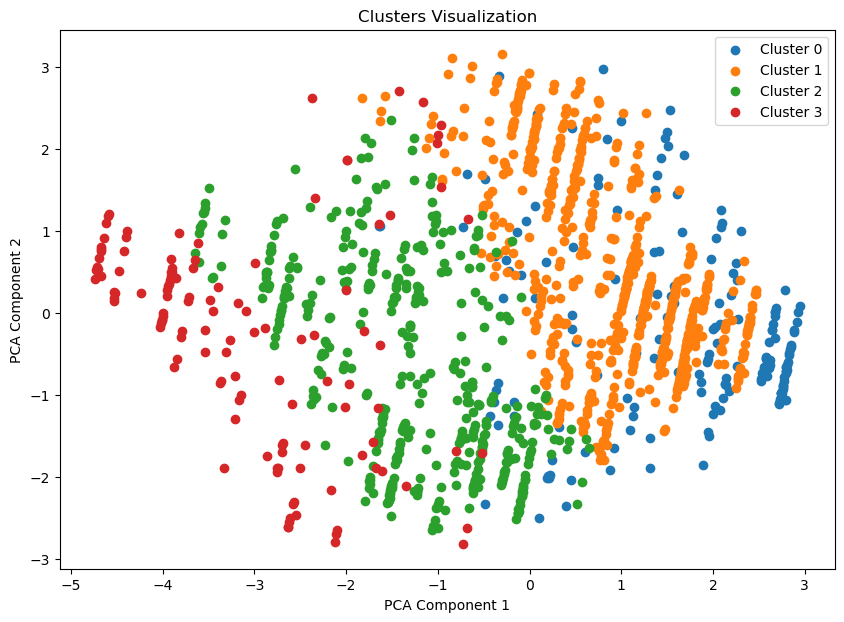

In [198]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for cluster in range(4):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

#### Extracting Data Points for Cluster 0

In [200]:
df['Cluster'] = data_encoded['Cluster']
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,1
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [227]:
cluster_0=df[df['Cluster']==0]
cluster_0[:50]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
10,No,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,-2,53,Every three months,Female,2
12,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,0,65,Every three months,Male,2
14,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,-3,67,Once a month,Male,2
33,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,-4,37,Never,Male,2
35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,-2,54,Every three months,Female,2
37,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,49,Every three months,Female,2
44,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,60,Never,Male,2
